In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/insurance_claims.txt', sep='|')
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

C:\Users\yonat\AppData\Local\Temp\ipykernel_29652\3635713960.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/insurance_claims.txt', sep='|')


In [4]:
print(df.info())
print(df.describe(include='all').T)
print(df.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

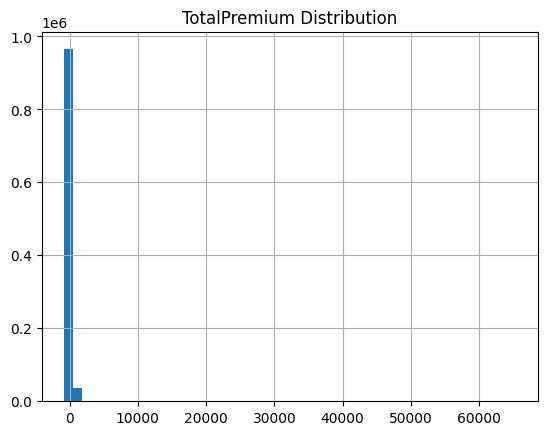

In [5]:
df['TotalPremium'].hist(bins=50)
plt.title('TotalPremium Distribution')
plt.show()

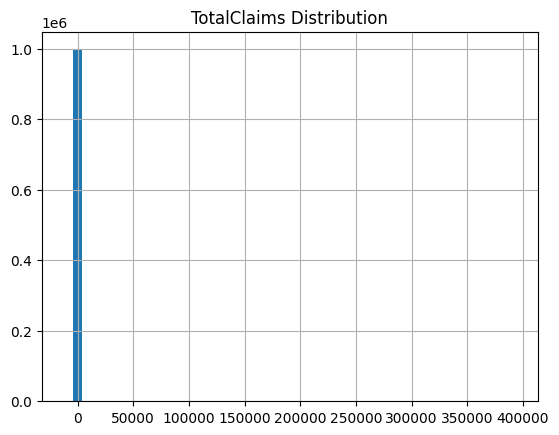

In [6]:
df['TotalClaims'].hist(bins=50)
plt.title('TotalClaims Distribution')
plt.show()

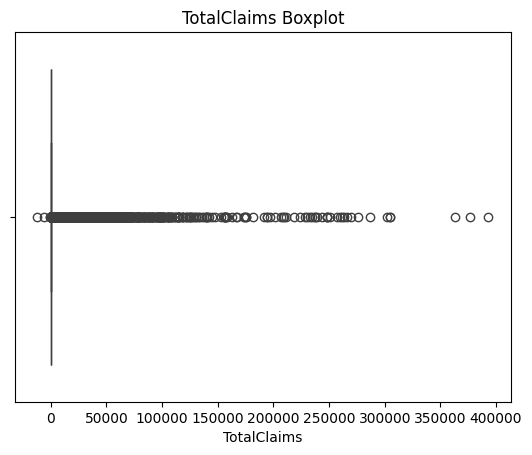

In [7]:
sns.boxplot(x=df['TotalClaims'])
plt.title('TotalClaims Boxplot')
plt.show()

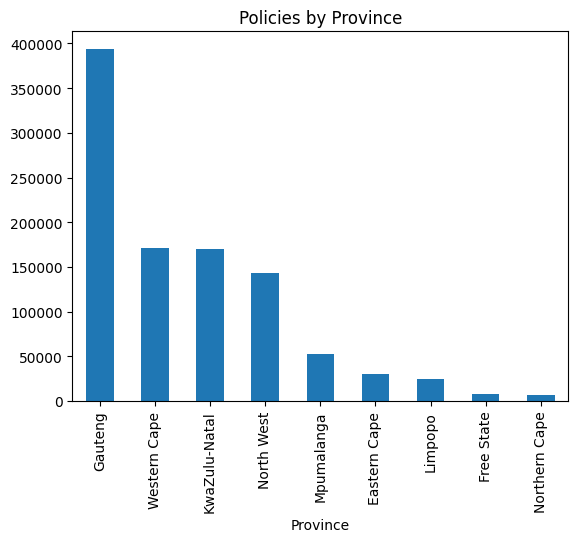

In [8]:
df['Province'].value_counts().plot(kind='bar')
plt.title('Policies by Province')
plt.show()

In [9]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
print(df.groupby('Province')['LossRatio'].mean())

Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

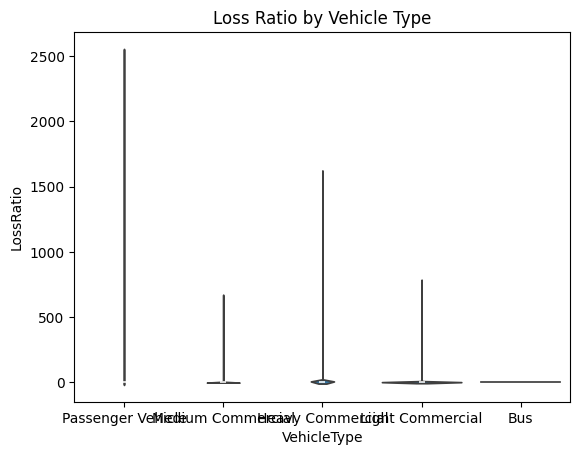

In [10]:
sns.violinplot(x='VehicleType', y='LossRatio', data=df)
plt.title('Loss Ratio by Vehicle Type')
plt.show